### Abalone Case Study

#### Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description.

### Features

    Name / Data Type / Measurement Unit / Description

1. Sex / nominal / -- / M, F, and I (infant)
2. Length / continuous / mm / Longest shell measurement
3. Diameter / continuous / mm / perpendicular to length
4. Height / continuous / mm / with meat in shell
5. Whole weight / continuous / grams / whole abalone
6. Shucked weight / continuous / grams / weight of meat
7. Viscera weight / continuous / grams / gut weight (after bleeding)
8. Shell weight / continuous / grams / after being dried

### Target

     Name / Data Type / Measurement Unit / Description
    
    Rings / integer / -- / +1.5 gives the age in years. 

#### We have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [126]:
#Loading the dataset
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.shape

(4177, 9)

The dataset has 9 columns and 4177 rows.

### Type of data in each columns

In [5]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

1. In the column 'Sex' there are three categories. "Male", "Female" and "Infant".
2. The columns ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight'] are continuous variables. 
3. The column 'Rings' is having integer values.

In [6]:
data['Rings'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29], dtype=int64)

In [7]:
len(data['Rings'].unique())

28

We have 28 unique values in the target column. This is a regression type of model.

### Checking for missing values.

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64


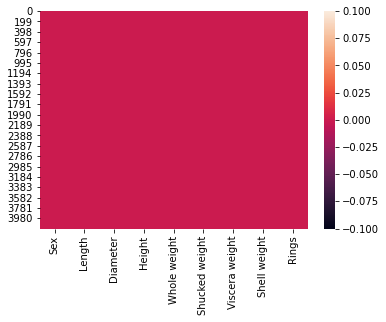

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull())
print(data.isnull().sum())

We don't have any null values in the dataset.

### Data Visualization

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


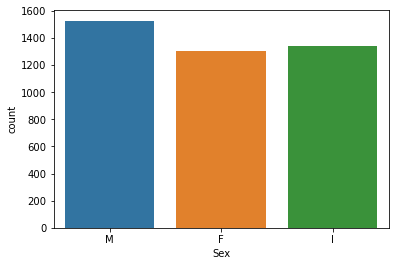

In [10]:
sns.countplot(data['Sex'])
print(data['Sex'].value_counts())

From the above observations, the number of data given for male abalone shells is 1528, feamale abalone shells is 1307 and infant abalone shells is 1342. The data is not having much imbalance. So we don't have to go for balancing techniques.

In [37]:
import numpy as np

Visualization of continuous data

In [40]:
#User defined function to plot the columns in histogram plot.
def histogramplot(col):
    plt.figure(figsize=[4,4])
    sns.histplot(x =col,data = data,bins =6,kde=True)
    print(np.histogram(data[col],bins=6))

(array([  43,  241,  694, 1431, 1561,  207], dtype=int64), array([0.075     , 0.19833333, 0.32166667, 0.445     , 0.56833333,
       0.69166667, 0.815     ]))


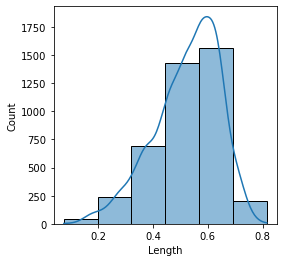

In [41]:
histogramplot('Length')

From the above observation, the data in the column 'Length' is almost normally distributed. Most of the data are within the rage from 0.4 to 0.7.

(array([  59,  278,  779, 1469, 1434,  158], dtype=int64), array([0.055     , 0.15416667, 0.25333333, 0.3525    , 0.45166667,
       0.55083333, 0.65      ]))


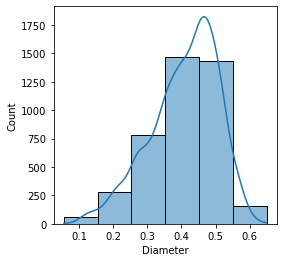

In [46]:
histogramplot('Diameter')

From the above observation, most of the data in the column are lying in the range from 0.3 to 0.55.

(array([3774,  401,    1,    0,    0,    1], dtype=int64), array([0.        , 0.18833333, 0.37666667, 0.565     , 0.75333333,
       0.94166667, 1.13      ]))


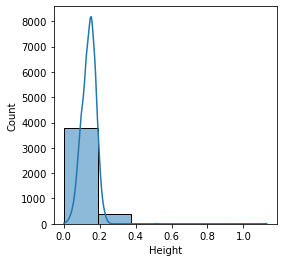

In [47]:
histogramplot('Height')

From the above observation, most of the data in the column 'height' are lying in range from 0.0 to 0.2.

(array([1150, 1388, 1144,  389,   91,   15], dtype=int64), array([2.00000000e-03, 4.72583333e-01, 9.43166667e-01, 1.41375000e+00,
       1.88433333e+00, 2.35491667e+00, 2.82550000e+00]))


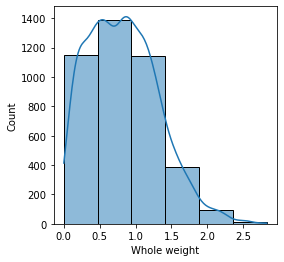

In [48]:
histogramplot('Whole weight')

From the above observation most of the data in the column 'Whole weight' are lying in range from 0.0 to 1.5.

(array([1496, 1605,  873,  159,   39,    5], dtype=int64), array([1.00000000e-03, 2.48833333e-01, 4.96666667e-01, 7.44500000e-01,
       9.92333333e-01, 1.24016667e+00, 1.48800000e+00]))


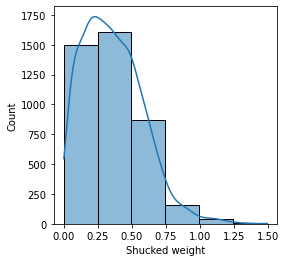

In [52]:
histogramplot('Shucked weight')

From the above observations, most the data in the column 'Shucked weight' are lying in range from 0.00 to 0.5.

(array([1493, 1646,  832,  183,   21,    2], dtype=int64), array([5.00000000e-04, 1.27083333e-01, 2.53666667e-01, 3.80250000e-01,
       5.06833333e-01, 6.33416667e-01, 7.60000000e-01]))


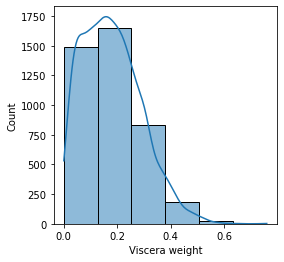

In [54]:
histogramplot('Viscera weight')

From the above observations, the data in the column 'Viscera weight' are lying in range from 0.0 to 0.3.

(array([1435, 1778,  812,  130,   17,    5], dtype=int64), array([0.0015 , 0.16875, 0.336  , 0.50325, 0.6705 , 0.83775, 1.005  ]))


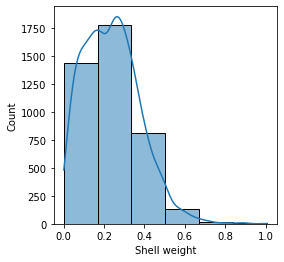

In [51]:
histogramplot('Shell weight')

From the above observation, the data in the column 'Shell weight' are lying in range from 0.0 to 0.34.

(array([ 189, 2541, 1083,  302,   57,    5], dtype=int64), array([ 1.        ,  5.66666667, 10.33333333, 15.        , 19.66666667,
       24.33333333, 29.        ]))


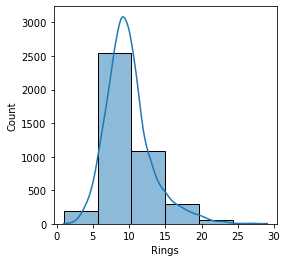

In [60]:
#Plotting the target column

histogramplot('Rings')

From the above observations, the data in the column 'Rings' are lying in the range from 5 to 12.

### Encoding the column 'Sex'

In [127]:
from sklearn.preprocessing import OrdinalEncoder
oec = OrdinalEncoder(categories = [['I','F','M']])
data['Sex'] = oec.fit_transform(data['Sex'].values.reshape(-1,1))
data['Sex'] = data['Sex'].astype(int)
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [128]:
oec.categories_

[array(['I', 'F', 'M'], dtype=object)]

## Statistical Summary

### Describe of columns

In [129]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.044530,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

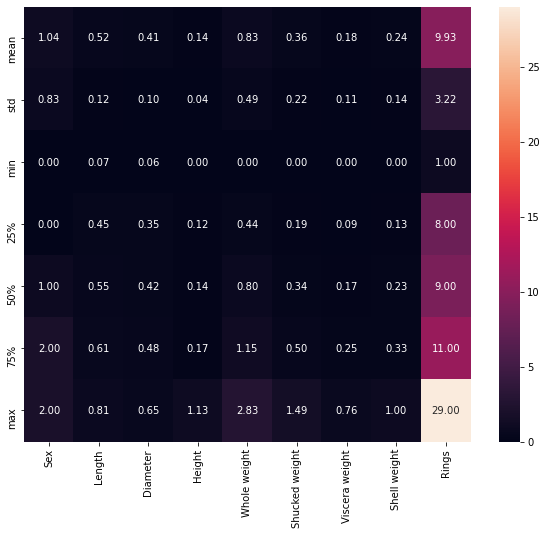

In [130]:
#Plotting the describe of the columns on heatmap.
plt.figure(figsize=[10,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f')

There are 4177 data in each columns in the dataset. The describe data of the target column is different from the feature columns.

### Correlation

In [131]:
Correlation = data.corr()
Correlation

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.448765,0.458245,0.417928,0.461238,0.440927,0.454658,0.445549,0.351822
Length,0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

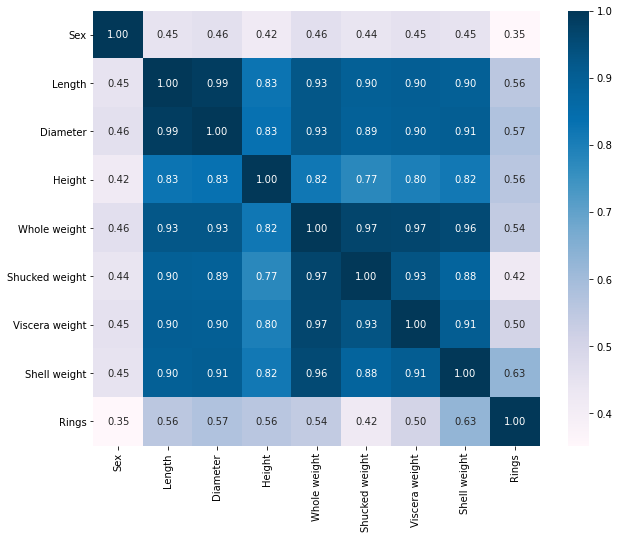

In [132]:
#Plotting the correlation of columns
plt.figure(figsize=[10,8])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='PuBu')

All the columns except the column ['Sex','Rings'] are having strong correlation bond to each other.

### Correlation with Target Column(Rings)

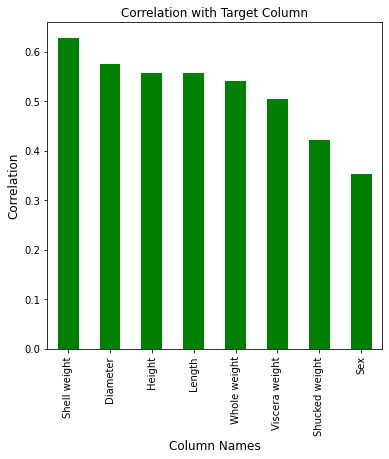

In [133]:
plt.figure(figsize = [6,6])
Correlation['Rings'].sort_values(ascending= False).drop('Rings').plot(kind = 'bar', color ='g')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

From the above observations, all the columns are positively correlated with the Target variable. The column with highest correlation with the target variable is 'Shell weight'. The column with lowest correlation with the target variable is 'Sex'.

### Distribution of data in columns

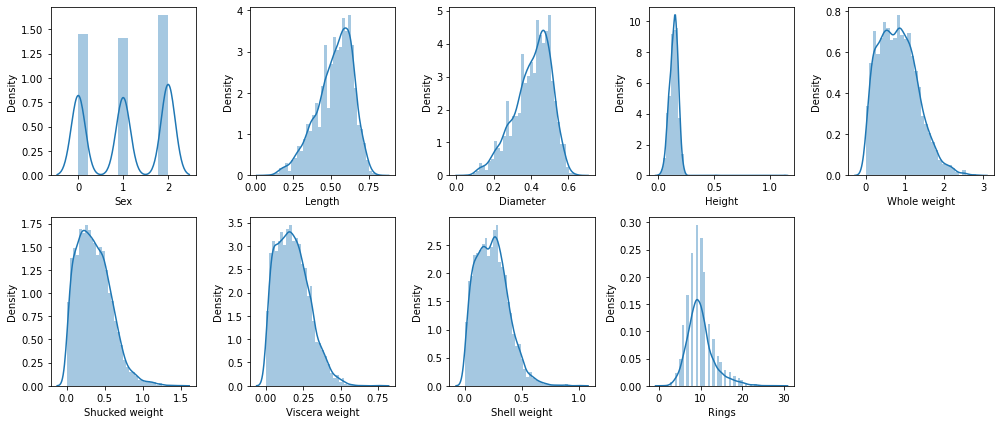

In [134]:
plt.figure(figsize = [14,6])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,5,i+1)
    sns.distplot(data[data.columns.values[i]])
    plt.tight_layout()

From the above observations, the distribution of data of columns are not normalized. Skewness is present in most of the columns.

### Skewness

In [135]:
Skewness = data.drop(['Sex','Rings'],axis=1).skew()
Skewness.sort_values(ascending=False)

Height            3.128817
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Diameter         -0.609198
Length           -0.639873
dtype: float64

The column height is having high skewness.

### Checking Outliers

In [137]:
data.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

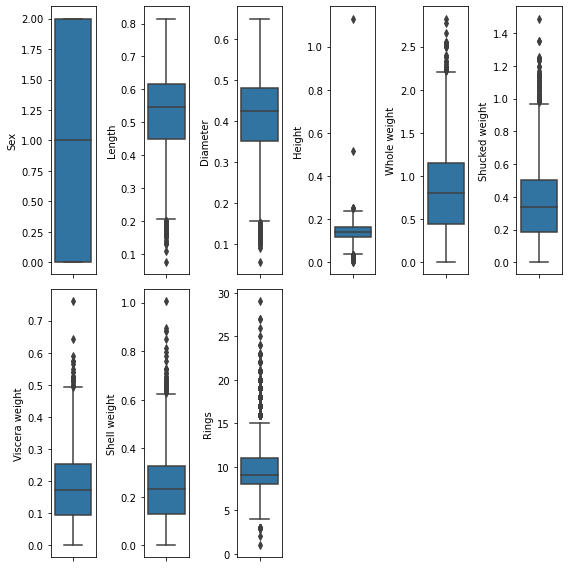

In [140]:
#Plotting each columns in boxplot to identify the outliers.
plt.figure(figsize = [8,8])
for i in range(0,len(data.columns.values)):
    plt.subplot(2,6,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

From the above observations, outliers are present in all columns except the column 'Sex'(nominal). Extreme outliers are present in column 'Height'.

### Splitting the data before removing skewness

In [258]:
x = data.drop(['Rings'],axis=1)
y = data['Rings']

In [259]:
print(x.shape)
print(y.shape)

(4177, 8)
(4177,)


In [260]:
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5]

Height            3.128817
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Diameter         -0.609198
Length           -0.639873
dtype: float64

Skewness is present in most of the columns if we set the standard range as +/-0.5.

Removing Skewness

In [261]:
from sklearn.preprocessing import power_transform
#user defined function for removing skewness for columns which are beyond standard range
def rskew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [262]:
rskew('Height')
rskew('Shucked weight')
rskew('Shell weight')
rskew('Viscera weight')
rskew('Whole weight')
rskew('Diameter')
rskew('Length')

In [263]:
x.skew()

Sex              -0.083056
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

Now we have removed the skewness of the data.

### Removing Outliers

In [264]:
from scipy.stats import zscore
df = x.copy()
df['Rings'] = y.copy()
z = np.abs(zscore(df))
z

array([[1.15434629, 0.68550213, 0.54986033, ..., 0.69328289, 0.587809  ,
        1.57154357],
       [1.15434629, 1.39634403, 1.38733299, ..., 1.33295268, 1.33241968,
        0.91001299],
       [0.05379815, 0.07077438, 0.00853714, ..., 0.25513514, 0.09826193,
        0.28962385],
       ...,
       [1.15434629, 0.59336612, 0.64519089, ..., 1.01560749, 0.59839786,
        0.28962385],
       [0.05379815, 0.85337516, 0.76992788, ..., 0.81518436, 0.51914542,
        0.02057072],
       [1.15434629, 1.83447784, 1.72628889, ..., 1.61134422, 1.65848824,
        0.64095986]])

In [265]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,2,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,1,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,2,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,0,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4173,2,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4174,2,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4175,1,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


In [266]:
df.shape

(4177, 9)

In [267]:
df_new.shape

(4089, 9)

In [268]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

2.1067751975101747

We are losing only 2.1% of the total data after removing outliers

### Checking the Multicolinearity of variables in the dataframe

In [269]:
x = df_new.drop('Rings',axis = 1)
y = df_new['Rings']

print(x.shape)
print(y.shape)

(4089, 8)
(4089,)


In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [271]:
calc_vif(x)

,Column Name,VIF Factor
0,Sex,1.098571
1,Length,36.543799
2,Diameter,35.346147
3,Height,7.043973
4,Whole weight,145.787511
5,Shucked weight,38.565306
6,Viscera weight,23.162297
7,Shell weight,31.791930


Since the column 'Whole weight' is showing high variance of inflationk, we can drop that column and calculate the vif again. 

In [299]:
x1 = x.drop(['Whole weight'],axis = 1)
calc_vif(x1)

,Column Name,VIF Factor
0,Sex,1.098262
1,Length,36.472623
2,Diameter,35.293526
3,Height,7.040403
4,Shucked weight,14.430732
5,Viscera weight,15.123110
6,Shell weight,15.822258


Now the vif have been reduced and we can proceed with further steps.

### End of EDA

### Machine learning modeling

#### Splitting the data into features and target

In [300]:
features = x1.copy()
target = y.copy()
print(features.shape)
print(target.shape)

(4089, 7)
(4089,)


In [463]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split


In [365]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
estimator = [('LR', LinearRegression()),
             ('KNN',KNeighborsRegressor()),
             ('SVR', SVR(gamma='auto')),
             ('DTR',DecisionTreeRegressor()),
             ('RFR',RandomForestRegressor(n_estimators=100))]
vtr = VotingRegressor(estimators=estimator)

#### Finding the best random_state

In [430]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [436]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [437]:
best_ran(lr)

LinearRegression()
At random state  83 the model is having r2 score of  0.572685381635617


In [438]:
mod_test(lr,83)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.572685381635617
__________________________________________________
Mean Sqaured Error is  3.4358036970607864
__________________________________________________
Mean Absolute Error is  1.3912816978572267
__________________________________________________
Coefficent is  [ 0.34918584 -0.34909312  0.36748936  1.02836025 -2.41476476  0.15447924
  2.9102077 ]
__________________________________________________
Intercept is  9.481009448180288
__________________________________________________


#### KNeighborsRegressor

In [439]:
best_ran(knn)

KNeighborsRegressor()
At random state  42 the model is having r2 score of  0.5312306496015506


In [440]:
mod_test(knn,42)

KNeighborsRegressor()
R2 score is  0.5312306496015506
__________________________________________________
Mean Sqaured Error is  3.871393643031785
__________________________________________________
Mean Absolute Error is  1.406356968215159
__________________________________________________


#### SVR

In [339]:
best_ran(svr)

SVR()
At random state  58 the model is having r2 score of  0.5872614904939892


In [340]:
mod_test(svr,58)

SVR()
R2 score is  0.5872614904939892
__________________________________________________
Mean Sqaured Error is  3.375696856901347
__________________________________________________
Mean Absolute Error is  1.3091431634069048
__________________________________________________


#### DecisionTreeRegressor

In [344]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  7 the model is having r2 score of  0.23121091860780207


In [354]:
mod_test(dtr,7)

DecisionTreeRegressor()
R2 score is  0.24435387447486046
__________________________________________________
Mean Sqaured Error is  6.255501222493888
__________________________________________________
Mean Absolute Error is  1.837408312958435
__________________________________________________


#### RandomForestRegressor

In [357]:
best_ran(rfr)

RandomForestRegressor()
At random state  15 the model is having r2 score of  0.5824725346432924


In [358]:
mod_test(rfr,15)

RandomForestRegressor()
R2 score is  0.5913276233406937
__________________________________________________
Mean Sqaured Error is  3.604606601466993
__________________________________________________
Mean Absolute Error is  1.448337408312958
__________________________________________________


#### AdaBoostRegressor

In [360]:
best_ran(abr)

AdaBoostRegressor()
At random state  95 the model is having r2 score of  0.4734836612330958


In [361]:
mod_test(abr,95)

AdaBoostRegressor()
R2 score is  0.4189760396901794
__________________________________________________
Mean Sqaured Error is  5.42877992482616
__________________________________________________
Mean Absolute Error is  1.9171767025667712
__________________________________________________


#### GradientBoostingRegressor

In [362]:
best_ran(gbr)

GradientBoostingRegressor()
At random state  15 the model is having r2 score of  0.5854277955296985


In [363]:
mod_test(gbr,15)

GradientBoostingRegressor()
R2 score is  0.5850694144758444
__________________________________________________
Mean Sqaured Error is  3.6598057836872324
__________________________________________________
Mean Absolute Error is  1.4504491852987675
__________________________________________________


#### VotingRegressor

In [369]:
best_ran(vtr)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At random state  83 the model is having r2 score of  0.5893071572572777


In [370]:
mod_test(vtr,89)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
R2 score is  0.5076492869622644
__________________________________________________
Mean Sqaured Error is  3.788699676929233
__________________________________________________
Mean Absolute Error is  1.4088103894275013
__________________________________________________


From the above algorithms, the ensemble methods are providing the maximum r2 score. The RandomForest model have provided R2 score of 59.13%(Accuracy). But the SVR model have given an R2 of 58.72% with the least mean sqaured error of 3.38 and least mean absolute error of 1.31.

### Cross Validation

In [453]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [454]:
cross_val(lr,83)

LinearRegression()
At cv fold 2  the cv score is  0.5192721135239916 and the R2 score  is  0.572685381635617


#### KNeighborsRegressor

In [455]:
cross_val(knn,42)

KNeighborsRegressor()
At cv fold 2  the cv score is  0.45869764183030276 and the R2 score  is  0.5312306496015506


#### SVR

In [456]:
cross_val(svr,58)

SVR()
At cv fold 3  the cv score is  0.5254926905991342 and the R2 score  is  0.5872614904939892


#### DecisionTreeRegressor

In [457]:
cross_val(dtr,7)

DecisionTreeRegressor()
At cv fold 2  the cv score is  0.09789195929559419 and the R2 score  is  0.21467146852790842


#### RandomForestRegressor

In [458]:
cross_val(rfr,15)

RandomForestRegressor()
At cv fold 2  the cv score is  0.5169435030718712 and the R2 score  is  0.5904033812368432


#### AdaBoostRegressor

In [459]:
cross_val(abr,95)

AdaBoostRegressor()
At cv fold 3  the cv score is  0.4000683380725185 and the R2 score  is  0.4316020589171473


#### GradientBoostingRegressor

In [460]:
cross_val(gbr,15)

GradientBoostingRegressor()
At cv fold 2  the cv score is  0.5346841661049253 and the R2 score  is  0.5853636321367841


#### VotingRegressor

In [461]:
cross_val(vtr,83)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At cv fold 2  the cv score is  0.5249142587007687 and the R2 score  is  0.5846619023230084


#### After cross validating the models, the Gradient Boosting Regresssor is performing well with a cross validation score of 53.47% and R2 score of 58.54%.The SVR model have a cross validation score of 52.55% with R2 score of 58.73%. Since the svr model is having the least mean squared error and least mean absolute error, we can consider the SVR model as the best model. 

### Regularization

In [468]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}


#### Lasso(L1)

In [467]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [465]:
ls = Lasso(alpha = 0.01, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.5341026530639325

In [466]:
cross_val(ls,0)

Lasso(alpha=0.01, random_state=0)
At cv fold 2  the cv score is  0.5183249468826837 and the R2 score  is  0.5536356993581566


#### Ridge(L2)

In [469]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [470]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.5370154990766209

In [471]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 2  the cv score is  0.519276257386323 and the R2 score  is  0.5554091103742922


#### ElasticNet

In [473]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [474]:
en = ElasticNet(alpha = 0.001, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.5365804190105417

In [475]:
cross_val(en,0)

ElasticNet(alpha=0.001, random_state=0)
At cv fold 2  the cv score is  0.5192579120246164 and the R2 score  is  0.5552990563765026


#### The regularization techniques didn't provide much better results. So we can stick to the svr model since it is performing well with all the tests.

### Hyper Parameter Tuning

In [479]:
parameters = {'kernel':['rbf','linear','poly','sigmoid'],
             'gamma':['scale','auto']}
grid = GridSearchCV(estimator=SVR(),param_grid=parameters,cv = 3)

In [480]:
grid.fit(features,target)
grid.best_score_

0.5262180237379405

In [482]:
grid.best_params_

{'gamma': 'auto', 'kernel': 'rbf'}

In [484]:
svr = SVR(gamma = 'auto',kernel='rbf')
features_train, features_test,target_train,target_test = train_test_split(features, target,test_size = 0.20, random_state = 58)
svr.fit(features_train,target_train)
pred_svr = svr.predict(features_test)
print('R2 Score',r2_score(target_test,pred_svr))
print('Mean Squared Error',mean_squared_error(target_test,pred_svr))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_svr))

R2 Score 0.5879534382436791
Mean Squared Error 3.3700375695075833
Mean Absolute Error 1.3077278459535806


In [485]:
cross_val(svr,58)

SVR(gamma='auto')
At cv fold 3  the cv score is  0.5262180237379405 and the R2 score  is  0.5879534382436791


### We are getting model accuracy(R2 Score) of 58.80% and cross validation score of 52.62% which shows our model is performing well than all other models with least mean squared error(3.37) and least mean absolute error(1.31).

### Saving the best model

In [487]:
import pickle
filename = 'abalone_age_prediction_model.pkl'
pickle.dump(svr,open(filename,'wb'))

### Conclusion

In [493]:
original = np.array(target_test)
predicted = np.round(np.array(svr.predict(features_test)),0)

prediction_test = pd.DataFrame({'Original Value':original,'Predicted Value':predicted})
prediction_test

,Original Value,Predicted Value
0,8,8.0
1,8,9.0
2,15,11.0
3,11,10.0
4,12,11.0
...,...,...
813,9,9.0
814,15,11.0
815,9,9.0
816,8,9.0


#### The model is performing well with prediction of data with an accuracy of 58.80% with the following given data.

1. Sex
2. Length
3. Diameter
4. Height
5. Shucked weight
6. Viscera weight
7. Shell weight

These measurements were easy to obtain which helped us to make the model for prediction. urther information, such as weather patterns and location (hence food availability) could help us to improve the accuracy of the model to make predictions with least errors.